### EX-3 Diamonds Dataset 이용한 가격 예측 모델 구현

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# csv 읽어오기
df = pd.read_csv("diamonds.csv")
# 가격 책정은 carat, depth, table, price 토대로 진행
df = df[['carat', 'depth', 'table', 'price']]
df.head()

,carat,depth,table,price
0,0.23,61.5,55.0,326
1,0.21,59.8,61.0,326
2,0.23,56.9,65.0,327
3,0.29,62.4,58.0,334
4,0.31,63.3,58.0,335


In [11]:
# 특성과 타겟 분리
X = df[['carat', 'depth', 'table']]
y = df['price']

In [ ]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 모델 학습 (선형 회귀)
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 예측 값 계산
y_pred = model.predict(X_test)

In [ ]:
# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MSE: 2333883.18
RMSE: 1527.71
R^2: 0.85


C:\Users\ez\AppData\Local\Temp\ipykernel_5200\3464584191.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


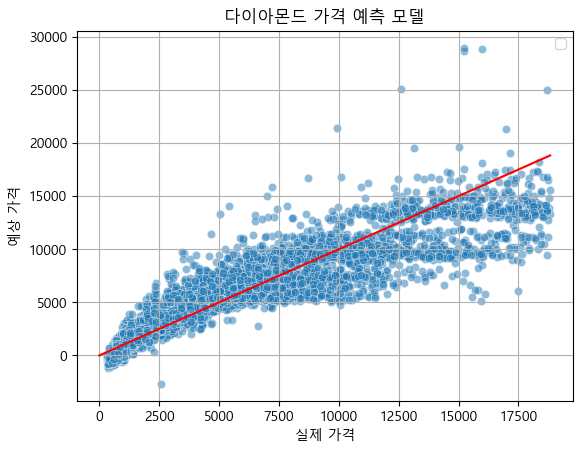

In [31]:
# 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("다이아몬드 가격 예측 모델")
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color = 'red')
plt.xlabel("실제 가격")
plt.ylabel("예상 가격")
plt.legend()
plt.grid(True)
plt.show()